In [1]:
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
#read csv file
data = pd.read_csv('data.csv')
#print data
print(data.head(569))

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
0      842302         M        17.99         10.38          122.80     1001.0  \
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [3]:
#remove id from list of features
data.drop('id', axis=1, inplace=True)

#select list of samples and list of features
#rows: samples
#columns: list of features except for the first one which is our labels
X = data.iloc[:,1:31].values

#select 'diagnosis as label 'M' or 'B'
y = data['diagnosis']

In [4]:
#select training set and test set
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20, random_state=27)
print(X_train)  
print(y_train)

[[2.722e+01 2.187e+01 1.821e+02 ... 2.688e-01 2.856e-01 8.082e-02]
 [2.110e+01 2.052e+01 1.381e+02 ... 2.280e-01 2.268e-01 7.425e-02]
 [1.585e+01 2.395e+01 1.037e+02 ... 1.119e-01 2.809e-01 6.287e-02]
 ...
 [1.185e+01 1.746e+01 7.554e+01 ... 9.140e-02 3.101e-01 7.007e-02]
 [1.321e+01 2.806e+01 8.488e+01 ... 7.958e-02 2.473e-01 6.443e-02]
 [1.354e+01 1.436e+01 8.746e+01 ... 1.288e-01 2.977e-01 7.259e-02]]
180    M
449    M
13     M
472    B
504    B
      ..
537    B
24     M
293    B
543    B
19     B
Name: diagnosis, Length: 455, dtype: object


In [21]:
#SVC Model
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
print('Accuracy:', sklearn.metrics.accuracy_score(SVC_prediction, y_test))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(SVC_prediction, y_test))
print(sklearn.metrics.classification_report(SVC_prediction, y_test))

Accuracy: 0.8947368421052632
Confusion Matrix:
[[68 11]
 [ 1 34]]
              precision    recall  f1-score   support

           B       0.99      0.86      0.92        79
           M       0.76      0.97      0.85        35

    accuracy                           0.89       114
   macro avg       0.87      0.92      0.88       114
weighted avg       0.91      0.89      0.90       114



In [22]:
#Decision Tree Model
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
DT_prediction = DT_model.predict(X_test)
print('Accuracy:', sklearn.metrics.accuracy_score(DT_prediction, y_test))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(DT_prediction, y_test))
print(sklearn.metrics.classification_report(DT_prediction, y_test))

Accuracy: 0.9210526315789473
Confusion Matrix:
[[66  6]
 [ 3 39]]
              precision    recall  f1-score   support

           B       0.96      0.92      0.94        72
           M       0.87      0.93      0.90        42

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



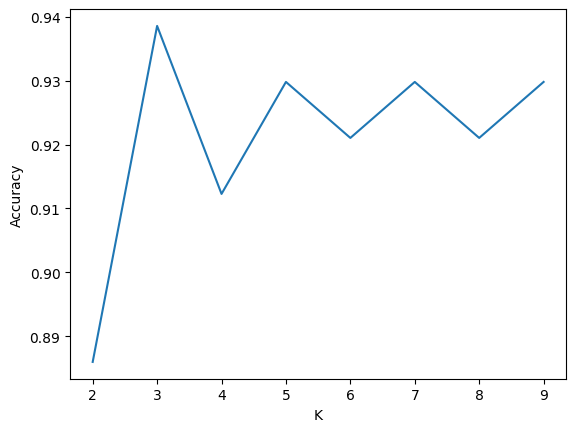

In [28]:
import matplotlib.pyplot as plt
import numpy as np

#finding k for KNN:
#create x-axis which is k = number of neighbors
neighbors = []

#array for result of classification with each k
KNN_model = []

#perform KNN for k = 2 to 9
for i in range(2, 10):
    neighbors.append(i)
    KNN_model.append(KNeighborsClassifier(n_neighbors=i))

KNN_prediction = []
for j in KNN_model:
    j.fit(X_train, y_train)
    KNN_prediction.append(j.predict(X_test))

#compare accuracy of each k    
accuracy = []
for z in KNN_prediction:
    accuracy.append(sklearn.metrics.accuracy_score(z, y_test))

#draw chart for accuracy of each k
plt.plot(neighbors, accuracy)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [32]:
#Kth Nearest Neighbor Model
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
print('Accuracy:', sklearn.metrics.accuracy_score(KNN_prediction, y_test))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(KNN_prediction, y_test))
print(sklearn.metrics.classification_report(KNN_prediction, y_test))

Accuracy: 0.9385964912280702
Confusion Matrix:
[[68  6]
 [ 1 39]]
              precision    recall  f1-score   support

           B       0.99      0.92      0.95        74
           M       0.87      0.97      0.92        40

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.93       114
weighted avg       0.94      0.94      0.94       114



In [25]:
#Naive Bayes Model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_prediction = NB_model.predict(X_test)
print('Accuracy:', sklearn.metrics.accuracy_score(NB_prediction, y_test))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(NB_prediction, y_test))
print(sklearn.metrics.classification_report(NB_prediction, y_test))

Accuracy: 0.9473684210526315
Confusion Matrix:
[[68  5]
 [ 1 40]]
              precision    recall  f1-score   support

           B       0.99      0.93      0.96        73
           M       0.89      0.98      0.93        41

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



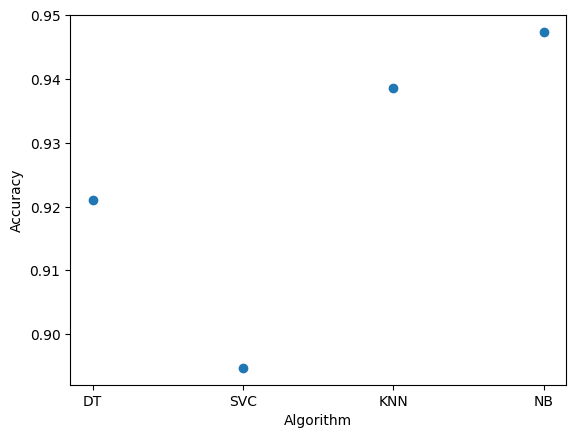

In [39]:
#compare accuracy of each algorithm
accuracies = []
accuracies.append(sklearn.metrics.accuracy_score(DT_prediction, y_test))
accuracies.append(sklearn.metrics.accuracy_score(SVC_prediction, y_test))
accuracies.append(sklearn.metrics.accuracy_score(KNN_prediction, y_test))
accuracies.append(sklearn.metrics.accuracy_score(NB_prediction, y_test))

algorithms = ['DT', 'SVC', 'KNN', 'NB']

#draw chart to show accuracy of algorithms in python implementation
plt.plot(algorithms, accuracies, 'o')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.show()

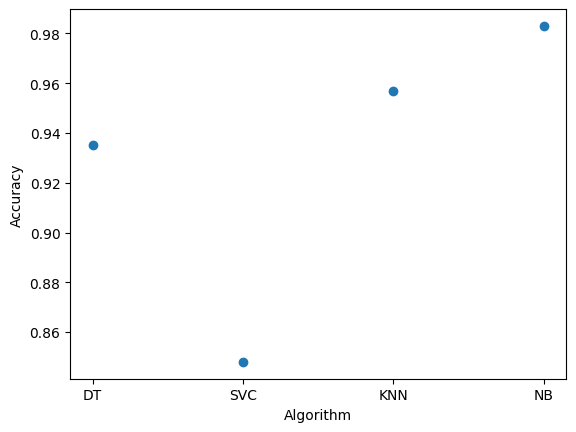

In [41]:
#compare accuracy of each algorithm
accuracies = []
accuracies.append(0.935)
accuracies.append(0.848)
accuracies.append(0.957)
accuracies.append(0.983)

algorithms = ['DT', 'SVC', 'KNN', 'NB']

#draw chart to show accuracy of algorithms in orange implementation
plt.plot(algorithms, accuracies, 'o')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.show()